In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19,MobileNet
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
train_dir = '../input/yoga-poses-dataset/DATASET/TRAIN'
test_dir = '../input/yoga-poses-dataset/DATASET/TEST'

In [5]:
train_datagen = ImageDataGenerator(width_shift_range = 0.2,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

In [9]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (224,224),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                    batch_size = 16,
                                                   subset = 'training')
validation_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                         target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                       batch_size = 16,
                                                       subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [10]:
model = tf.keras.Sequential()
model.add(MobileNet(include_top = False,weights = 'imagenet',input_shape= (224,224,3)))
model.add(Flatten())
model.add(Dense(5,activation = 'softmax'))

17227776/17225924 [==============================] - 1s 0us/step


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 250885    
Total params: 3,479,749
Trainable params: 3,457,861
Non-trainable params: 21,888
_________________________________________________________________


In [12]:
optimizer = Adam(lr = 0.0001)
model.compile(loss = "categorical_crossentropy",optimizer = optimizer,metrics = ['accuracy'])
epochs = 25
batch_size = 16

In [13]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/25
 6/55 [==>...........................] - ETA: 18s - loss: 2.8302 - accuracy: 0.1615

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


55/55 [==============================] - 35s 543ms/step - loss: 1.7120 - accuracy: 0.5021 - val_loss: 0.1669 - val_accuracy: 0.9348
Epoch 2/25
55/55 [==============================] - 24s 416ms/step - loss: 0.3017 - accuracy: 0.9134 - val_loss: 0.2367 - val_accuracy: 0.9130
Epoch 3/25
55/55 [==============================] - 24s 439ms/step - loss: 0.2007 - accuracy: 0.9443 - val_loss: 0.0744 - val_accuracy: 0.9783
Epoch 4/25
55/55 [==============================] - 24s 440ms/step - loss: 0.1675 - accuracy: 0.9404 - val_loss: 0.0693 - val_accuracy: 0.9783
Epoch 5/25
55/55 [==============================] - 23s 425ms/step - loss: 0.0807 - accuracy: 0.9692 - val_loss: 0.0407 - val_accuracy: 0.9783
Epoch 6/25
55/55 [==============================] - 24s 432ms/step - loss: 0.1124 - accuracy: 0.9599 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 7/25
55/55 [==============================] - 24s 441ms/step - loss: 0.0627 - accuracy: 0.9829 - val_loss: 0.0251 - val_accuracy: 0.9891
Epoch 8/25

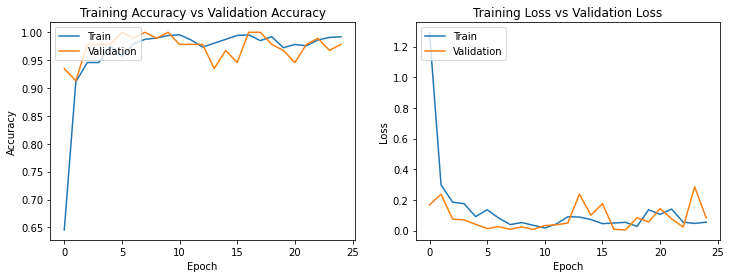

In [14]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [15]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

6/6 [==============================] - 3s 570ms/step - loss: 0.0820 - accuracy: 0.9783
final train accuracy = 99.65 , validation accuracy = 97.83


In [16]:
model.save('YogaNet_Model_3_MobileNet.h5')

In [20]:
from keras.models import load_model
from keras.applications.mobilenet import preprocess_input
model = load_model('YogaNet_Model_3_MobileNet.h5')
img = image.load_img('../input/yoga-poses-dataset/DATASET/TEST/goddess/00000000.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 

[[2.3537041e-17 1.0000000e+00 2.6948407e-18 2.1295605e-13 2.5871732e-14]]
